# **TP2**: Polynomial Interpolation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import sympy
import scipy

## Exo1:

We have $x_0=0, x_1=0.5, x_2=1, x_3=2$, and $f\left(x_0\right)=0, \quad f\left(x_1\right)=y, \quad f\left(x_2\right)=3, \quad f\left(x_3\right)=2$.

The Lagrange polynomial of order 3 , connecting the four points, is given by :
$$
P_3(x)=L_0(x) f\left(x_0\right)+L_1(x) f\left(x_1\right)+L_2(x) f\left(x_2\right)+L_3(x) f\left(x_3\right),
$$
where
$$
L_{n,k} = \prod_{\substack{i=0 \\ i \neq k}}^{n} \frac{x-x_i}{x_k - x_i}
$$
So that:
$$
\begin{aligned}
L_0(x) & =\frac{\left(x-x_1\right)\left(x-x_2\right)\left(x-x_3\right)}{\left(x_0-x_1\right)\left(x_0-x_2\right)\left(x_0-x_3\right)} \\
L_1(x) & =\frac{\left(x-x_0\right)\left(x-x_2\right)\left(x-x_3\right)}{\left(x_1-x_0\right)\left(x_1-x_2\right)\left(x_1-x_3\right)} \\
L_2(x) & =\frac{\left(x-x_0\right)\left(x-x_1\right)\left(x-x_3\right)}{\left(x_2-x_0\right)\left(x_2-x_1\right)\left(x_2-x_3\right)} \\
L_3(x) & =\frac{\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)}{\left(x_3-x_0\right)\left(x_3-x_1\right)\left(x_3-x_2\right)}
\end{aligned}
$$
Thus, for this problem,
$$
\begin{aligned}
& L_0(x)=\frac{(x-0.5)(x-1)(x-2)}{(0-0.5)(0-1)(0-2)}=\frac{x^3-\frac{7}{2} x^2+\frac{7}{2} x-1}{-1}=-x^3+\frac{7}{2} x^2-\frac{7}{2} x+1 \\
& L_1(x)=\frac{(x-0)(x-1)(x-2)}{(0.5-0)(0.5-1)(0.5-2)}=\frac{x^3-3 x^2+2 x}{\frac{3}{8}}=\frac{8}{3} x^3-8 x^2+\frac{16}{3} x \\
& L_2(x)=\frac{(x-0)(x-0.5)(x-2)}{(1-0)(1-0.5)(1-2)}=\frac{x^3-\frac{5}{2} x^2+x}{-\frac{1}{2}}=-2 x^3+5 x^2-2 x \\
& L_3(x)=\frac{(x-0)(x-0.5)(x-1)}{(2-0)(2-0.5)(2-1)}=\frac{x^3-\frac{3}{2} x^2+\frac{1}{2} x}{3}=\frac{1}{3} x^3-\frac{1}{2} x^2+\frac{1}{6} x
\end{aligned}
$$

Thus,
$$
\begin{aligned}
P_3(x) & =L_0(x) f\left(x_0\right)+L_1(x) f\left(x_1\right)+L_2(x) f\left(x_2\right)+L_3(x) f\left(x_3\right) \\
& =L_0(x) \cdot 0+L_1(x) \cdot y+L_2(x) \cdot 3+L_3(x) \cdot 2 \\
& =\left(\frac{8}{3} x^3-8 x^2+\frac{16}{3} x\right) y-6 x^3+15 x^2-6 x+\frac{2}{3} x^3-x^2+\frac{1}{3} x \\
& =\left(\frac{8}{3} y-6+\frac{2}{3}\right) x^3+(-8 y+15-1) x^2+\left(\frac{16}{3} y-6+\frac{1}{3}\right) x \\
& =\left(\frac{8 y-16}{3}\right) x^3+(-8 y+14) x^2+\left(\frac{16 y-17}{3}\right) x
\end{aligned}
$$
Since we want the coefficient of $x^3$ to be equal to 6 , we need:
$$
\begin{gathered}
\frac{8 y-16}{3}=6, \\
\text { or } y=\frac{34}{8}=4.25 
\end{gathered}
$$
With such $y$, the polynomial becomes
$$
P_3(x)=6 x^3-20 x^2+17 x 
$$

## Exo2:

In [9]:
def Lagrange(Lx, Ly):
    x = sympy.symbols('x')
    if  len(Lx)!= len(Ly):
        print("The number of Lx and Ly must be the same !")
    y = 0
    for k in range(len(Lx)):
        t = 1
        for j in range (len(Lx)):
            if j != k:
                t = t * ((x-Lx[j]) /(Lx[k]-Lx[j]))
        y += t*Ly[k]
    return y

## (a).

In [10]:
function_2a = lambda x: np.exp(2*x)*np.cos(3*x)
coeff_x = [0, 0.3, 0.6]
coeff_y = [function_2a(x) for x in coeff_x]
coeff_y

[1.0, 1.1326472096961255, -0.7543375194717092]

In [11]:
print("P_2(x) = ", Lagrange(Lx=coeff_x, Ly=coeff_y))

P_2(x) =  3.77549069898709*x*(2.0 - 3.33333333333333*x) - 1.25722919911952*x*(3.33333333333333*x - 1.0) + 1.0*(1.0 - 3.33333333333333*x)*(1.0 - 1.66666666666667*x)


In [12]:
print("P_2(x) = ", sympy.expand(Lagrange(Lx=coeff_x, Ly=coeff_y)))

P_2(x) =  -11.2201774381331*x**2 + 3.80821059709369*x + 1.0


The formula for the error bound is given by
$$
E_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1) !} \times\left(x-x_0\right)\left(x-x_1\right) \ldots\left(x-x_n\right)
$$

So that the absolute error is given by:
$$
|E_n(x)|= \left|\frac{f^{(n+1)}(\xi(x))}{(n+1) !} \times\left(x-x_0\right)\left(x-x_1\right) \ldots\left(x-x_n\right)\right|  \leq \max_{x \in (0,0.6)} \left|\frac{f^{(n+1)}(x)}{(n+1) !} \times\left(x-x_0\right)\left(x-x_1\right) \ldots\left(x-x_n\right)\right|
$$
Since we do not know where $\xi(x)$ is, we will find each error over the range and multiply those together, so we have
$$
\max _{x \in (0,0.6)}\left|f^{(3)}(x)\right|=\max _{x \in (0,0.6)}\left|-9 e^{2 x} \sin 3 x - 46 e^{2 x} \cos 3 x\right|= 65.652195
$$
Next, we need to find
$$
\max _{x \in (0,0.6)}|(x-0)(x-0.3)(x-0.6)|=0.010392
$$
Thus we have an error bound :
$$
E_2(x)=\frac{65.652195}{6} \times 0.010392 \leq 0.11371
$$

In [14]:
# We can use scipy.optimize.fmin on the negative of the function to find the maximum
fun_2a = lambda x: np.abs(-9*np.exp(2*x)*np.sin(3*x) - 46*np.exp(2*x)*np.cos(3*x))
max_x_2a = scipy.optimize.fmin(lambda x: -fun_2a(x), 0)
max_x_2a

Optimization terminated successfully.
         Current function value: -65.652195
         Iterations: 21
         Function evaluations: 42


array([0.260375])

In [15]:
fun_2a_ = lambda x: np.abs(x*(x-0.3)*(x-0.6))
max_x_2a_ = scipy.optimize.fmin(lambda x: -fun_2a_(x), 0.5)
max_x_2a_

Optimization terminated successfully.
         Current function value: -0.010392
         Iterations: 10
         Function evaluations: 20


array([0.47324219])

In [8]:
65.652195*0.010392/6

0.11370960174000001

## (b).

In [16]:
function_2b = lambda x: np.sin(np.log(x))
coeff_x = [2, 2.4, 2.6]
coeff_y = [function_2b(x) for x in coeff_x]
coeff_y

[0.6389612763136348, 0.7678438770758819, 0.8166090487957713]

In [17]:
print("P_2(x) = ", Lagrange(Lx=coeff_x, Ly=coeff_y))

P_2(x) =  0.638961276313635*(4.33333333333333 - 1.66666666666667*x)*(6.0 - 2.5*x) + 0.767843877075882*(13.0 - 5.0*x)*(2.5*x - 5.0) + 0.816609048795771*(1.66666666666667*x - 3.33333333333333)*(5.0*x - 12.0)


In [18]:
print("P_2(x) = ", sympy.expand(Lagrange(Lx=coeff_x, Ly=coeff_y)))

P_2(x) =  -0.130634405510284*x**2 + 0.896997886150864*x - 0.632496873946955


The formula for the error bound is given by
$$
E_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1) !} \times\left(x-x_0\right)\left(x-x_1\right) \ldots\left(x-x_n\right)
$$
Since we do not know where $\xi(x)$ is, we will find each error over the range and multiply those together, so we have
$$
\max _{x \in (2,2.6)}\left|f^{(3)}(x)\right|=\max _{x \in (2,2.6)}\left|\frac{3}{x^3} \sin (\ln(x)) + \frac{1}{x^3} \cos (\ln(x))\right|= 0.33576534128810953
$$
Next, we need to find
$$
\max _{x \in (2,2.6)}|(x-2)(x-2.4)(x-2.6)|=0.016901
$$
Thus we have an error bound :
$$
E_2(x)=\frac{0.33576534128810953}{6} \times 0.016901 \leq 9.458 \times 10^{-4}
$$

In [19]:
# We use the maximum value of the interest function in the interval 
fun_2b = lambda x: np.abs((3/x**3)*np.sin(np.log(x)) + (1/x**3)*np.cos(np.log(x)))
print(fun_2b(2))
print(fun_2b(2.6))

0.33576534128810953
0.1722245294219641


In [20]:
fun_2b_ = lambda x: np.abs((x-2)*(x-2.4)*(x-2.6))
max_x_2b_ = scipy.optimize.fmin(lambda x: -fun_2b_(x), 2)
max_x_2b_

Optimization terminated successfully.
         Current function value: -0.016901
         Iterations: 12
         Function evaluations: 24


array([2.15693359])

In [21]:
fun_2b(2)*0.016901/6

0.0009457950055183898

## Exo3:

Let $f(x)=e^x$, for $0 \leq x \leq 2$.

## (a).

**Recall:** **Linear interpolation** is achieved by constructing the Lagrange polynomial $P_1$ of order 1 , connecting the two points. 

We have:
$$
P_1(x)=L_0(x) f\left(x_0\right)+L_1(x) f\left(x_1\right)
$$
where
$$
\begin{aligned}
L_0(x) & =\frac{x-x_1}{x_0-x_1}=\frac{x-0.5}{-0.5}, \\
L_1(x) & =\frac{x-x_0}{x_1-x_0}=\frac{x}{0.5} .
\end{aligned}
$$
Thus,
$$
P_1(x)=-\frac{x-0.5}{0.5} \cdot e^0+\frac{x}{0.5} \cdot e^{0.5}=-2 x+1+3.2974 x=1.2974 x+1 .
$$
We can check whether this polynomial interpolates function $f$, that is, whether we got the correct answer. Note that
$$
\begin{aligned}
P_1(0) & =1=e^0, \\
P_1(0.5) & =1.6487=e^{0.5} .
\end{aligned}
$$
Now we can evaluate
$$
P_1(0.25)=1.2974 \cdot 0.25+1=1.32435, \quad \checkmark
$$
which is an approximation of $f(0.25)$. The true value of $f$ at $x=0.25$ is $f(0.25)=e^{0.25}=$ 1.2840. 
Thus, we obtained a reasonable approximation.

In [15]:
np.exp(0.5)/0.5 - 2

1.2974425414002564

In [16]:
1.2974*0.25 + 1

1.32435

In [17]:
np.exp(0.25)

1.2840254166877414

In [22]:
function_3 = lambda x: np.exp(x)
coeff_x = [0, 0.5]
coeff_y = [function_3(x) for x in coeff_x]
print("P_1(x) = ", sympy.expand(Lagrange(Lx=coeff_x, Ly=coeff_y)))

P_1(x) =  1.29744254140026*x + 1.0


## (b).

Same method as in question (a). We found $P_1(x) = 2.13912111551783 x + 0.579160712941211$.

Now we can evaluate
$$
P_1(0.75)=2.1835015495795833, \quad \checkmark
$$
which is an approximation of $f(0.75)$. The true value of $f$ at $x=0.75$ is $f(0.75)=e^{0.75}= 2.117$. 
Thus, we obtained a reasonable approximation.

In [23]:
function_3 = lambda x: np.exp(x)
coeff_x = [0.5, 1]
coeff_y = [function_3(x) for x in coeff_x]
print("P_1(x) = ", sympy.expand(Lagrange(Lx=coeff_x, Ly=coeff_y)))

P_1(x) =  2.13912111551783*x + 0.579160712941211


In [24]:
P_1 = lambda x: 2.13912111551783*x + 0.579160712941211
P_1(0.75)

2.1835015495795833

In [25]:
np.exp(0.75)

2.117000016612675

## (c).

We have:
$$
P_2(x)=L_0(x) f\left(x_0\right)+L_1(x) f\left(x_1\right) + L_2(x) f\left(x_2\right)
$$
where
$$
\begin{aligned}
L_0(x) & =\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}=\frac{(x-1)(x-2)}{(0-1)(0-2)} = \frac{x^2 - 3x + 2}{2}, \\
L_1(x) & =\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}=\frac{x(x-2)}{(1-0)(1-2)} = 2x - x^2, \\
L_2(x) & =\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}=\frac{x(x-1)}{(2-0)(2-1)} = \frac{x^2 - x}{2}
\end{aligned}
$$
Thus,
$$
P_2(x)= \frac{x^2 - 3x + 2}{2} \cdot e^0 + (2x - x^2) \cdot e^{1} + \frac{x^2 - x}{2} \cdot e^{2} = 1.4762462210062801 x^2 + 0.24203560745276498 x + 1
$$

Now we can evaluate
$$
P_2(0.25)=1.1527742906760838,  \quad P_2(0.75)=2.0119152049056064 \quad \checkmark
$$
which is the approximations of $f(0.25)$ and $f(0.75)$, respectively.

In [26]:
0.5-np.exp(1)+0.5*np.exp(2)

1.4762462210062801

In [27]:
-1.5+2*np.exp(1)-0.5*np.exp(2)

0.24203560745276498

In [28]:
function_3 = lambda x: np.exp(x)
coeff_x = [0, 1, 2]
coeff_y = [function_3(x) for x in coeff_x]
print("P_2(x) = ", sympy.expand(Lagrange(Lx=coeff_x, Ly=coeff_y)))

P_2(x) =  1.47624622100628*x**2 + 0.242035607452765*x + 1.0


In [29]:
P_2 = lambda x: 1.47624622100628*x**2 + 0.242035607452765*x + 1.0
print(P_2(0.25))
print(P_2(0.75))

1.1527742906760838
2.0119152049056064


## (d).

In [30]:
print(np.exp(0.25))
print(np.exp(0.75))

1.2840254166877414
2.117000016612675


Part **(a)** and **(b)** are better due to the spacing of the nodes.

## Exo4:

The error function is defined by: $\text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{t} e^{-t^2} dt$.

It gives the probability that any one of a series of trials will lie within $x$ units of the mean, assuming that
the trials have a normal distribution with mean $0$ and standard deviation $\frac{\sqrt{2}}{2}$. This integral cannot
be evaluated in terms of elementary functions, so an approximating technique must be used.

## (a).

We use Taylor series for $e^x$, that is:
$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots = \sum_{n=0}^{+\infty} \frac{x^n}{n!}
$$
We change $x$ to $-x^2$, we have:
$$
e^{-x^2} = 1 - x^2 + \frac{(-x^2)^2}{2!} + \frac{(-x^2)^3}{3!} + \frac{(-x^2)^4}{4!} +\dots = 1 - x^2 + \frac{x^4}{2!} - \frac{x^6}{3!} + \frac{x^8}{4!} +\dots
$$
So that:
$$
\int_{0}^{x} e^{-t^2} dt = \int_{0}^{x} \left( 1 - t^2 + \frac{t^4}{2!} - \frac{t^6}{3!} + \frac{t^8}{4!} +\dots \right) dt = x - \frac{x^3}{3} + \frac{x^5}{5 \times 2!} - \frac{x^7}{7 \times 3!} + \frac{x^9}{9 \times 4!} +\dots = \sum_{n=0}^{+\infty} \frac{(-1)^n x^{2n+1}}{(2n+1) \times n!}
$$
Therefore,
$$
\text{erf}(x) = \frac{2}{\sqrt{\pi}} \sum_{n=0}^{+\infty} \frac{(-1)^n x^{2n+1}}{(2n+1) \times n!}
$$

## (b).

In [2]:
def Maclaurin_erf(x, n):
    tmp = 0
    for k in range(n):
        tmp += ((-1)**k)*x**(2*k+1)/((2*k+1)*math.factorial(k))
    return tmp*2/np.sqrt(math.pi)

In [3]:
Maclaurin_erf(x=0, n=100)

0.0

In [4]:
Maclaurin_erf(x=0.2, n=100)

0.22270258921047845

In [14]:
## Create a table
list_x = [0.2*i  for i in range(6)]
list_erf = [Maclaurin_erf(x=i, n=100) for i in list_x]
df = pd.DataFrame({'x_i': list_x, 'erf_x_i': list_erf})
df

,x_i,erf_x_i
0,0.0,0.000000
1,0.2,0.222703
2,0.4,0.428392
3,0.6,0.603856
4,0.8,0.742101
5,1.0,0.842701


## (c).

For linear interpolation, by using the table above, we can start with $x_0=0.2$ and $x_1=0.4$. We obtain then the approximation of the error function using linear interpolation :
$$
P_1(x) = 1.02844882918095x + 0.0170128233742884
$$
So that: $P_1(1/3)=0.3598$ which is an approximation of $\text{erf}(1/3)$.

In [16]:
coeff_x = [0.2, 0.4]
coeff_y = [Maclaurin_erf(x=x, n=100) for x in coeff_x]
print("P_1(x) = ", sympy.expand(Lagrange(Lx=coeff_x, Ly=coeff_y)))

P_1(x) =  1.02844882918095*x + 0.0170128233742884


In [17]:
P_1_erf = lambda x: 1.02844882918095*x + 0.0170128233742884
P_1_erf(1/3)

0.35982909976793837

Similarly for quadratic interpolation, by using the table above, we can start with $x_0=0.2$, $x_1=0.4$ and $x_2=0.6$. We obtain then the approximation of the error function using quadratic interpolation :
$$
P_2(x) = -0.377825375436657 x^2 + 1.25514405444294x - 0.0132132066606441
$$
So that: $P_2(1/3)=0.3632$ which is an approximation of $\text{erf}(1/3)$.

In [19]:
coeff_x = [0.2, 0.4, 0.6]
coeff_y = [Maclaurin_erf(x=x, n=100) for x in coeff_x]
print("P_2(x) = ", sympy.expand(Lagrange(Lx=coeff_x, Ly=coeff_y)))

P_2(x) =  -0.377825375436657*x**2 + 1.25514405444294*x - 0.0132132066606441


In [20]:
P_2_erf = lambda x: -0.377825375436657*x**2 + 1.25514405444294*x - 0.0132132066606441
P_2_erf(1/3)

0.36318754754959626

Since $\text{erf}(1/3) \approx 0.3626$, therefore the quadratic interpolation seems to be more accurate.

In [22]:
Maclaurin_erf(x=1/3, n=100)

0.36264811176606293

## Exo5:

Use Neville’s method to obtain the approximations for Lagrange interpolating polynomials of degrees one, two, and three to approximate each of the following:

**Neville's algorithm** is used for recursive evaluation of Lagrange interpolating polynomial. The recurence is given by the following relation,
$$
L_{i, j}=\frac{\left(x-x_j\right) L_{i, j-1}-\left(x-x_i\right) L_{i+1, j}}{x_i-x_j}, \quad L_{i, i}=y_i, \quad i, j=0,1, \ldots, n-1 .
$$
The Lagrange interpolating polynomial is then $L(x)=L_{0, n-1}$.

In [79]:
def NevillesMethod(Lx, Ly):
    x = sympy.symbols('x')
    if  len(Lx)!= len(Ly):
        print("The number of Lx and Ly must be the same !")
        
    n = len(Lx)
    Q = [[0] * n for i in range(n)]

    ## STEP 1:
    for i in range(n):
        Q[i][0] = Ly[i]
    
    ## STEP 2:
    for j in range(1, n):
        for i in range(n - j):
            Q[i][j] = ((x - Lx[i+j]) * Q[i][j-1] - (x - Lx[i]) * Q[i+1][j-1]) / (Lx[i] - Lx[i+j])

    return sympy.expand(Q[0][n-1])

In [213]:
def neville_algorithm(x, y, xi):
    """
    Evaluates the interpolating polynomial that passes through the data points (x, y) at the point xi
    using Neville's algorithm.

    Parameters:
        x (list): The x-coordinates of the data points.
        y (list): The y-coordinates of the data points.
        xi (float): The point at which to evaluate the interpolating polynomial.

    Returns:
        The table Q and the value of the interpolating polynomial at the point xi.
    """
    n = len(x)
    Q = [[0] * n for i in range(n)]

    ## STEP 1:
    for i in range(n):
        Q[i][0] = y[i]

    ## STEP 2:
    for j in range(1, n):
        for i in range(n - j):
            Q[i][j] = ((xi - x[i+j]) * Q[i][j-1] - (xi - x[i]) * Q[i+1][j-1]) / (x[i] - x[i+j])

    return np.array(Q), Q[0][n-1]

In [214]:
print("For Lagrange interpolating polynomial of degree three (example in course):")
coeff_x = [0, 1, 2, 3]
coeff_y = [3, 6, 11, 18]
print("P_3(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=1.5))
print("P_3(1.5) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=1.5)[1])

For Lagrange interpolating polynomial of degree three (example in course):
P_3(x) =  x**2 + 2*x + 3
(array([[ 3.  ,  7.5 ,  8.25,  8.25],
       [ 6.  ,  8.5 ,  8.25,  0.  ],
       [11.  ,  7.5 ,  0.  ,  0.  ],
       [18.  ,  0.  ,  0.  ,  0.  ]]), 8.25)
P_3(1.5) =  8.25


## (a).

In [105]:
print("For Lagrange interpolating polynomial of degree one:")
coeff_x = [0, 0.25]
coeff_y = [1, 1.64872]
print("P_1(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=0.43))
print("P_1(0.43) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=0.43)[1])

For Lagrange interpolating polynomial of degree one:
P_1(x) =  2.59488*x + 1.0
(array([[1.       , 2.1157984],
       [1.64872  , 0.       ]]), 2.1157984)
P_1(0.43) =  2.1157984


In [100]:
print("For Lagrange interpolating polynomial of degree two:")
coeff_x = [0, 0.25, 0.5]
coeff_y = [1, 1.64872, 2.71828]
print("P_2(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=0.43))
print("P_2(0.43) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=0.43)[1])

For Lagrange interpolating polynomial of degree two:
P_2(x) =  3.36672*x**2 + 1.7532*x + 1.0
(array([[1.        , 2.1157984 , 2.37638253],
       [1.64872   , 2.4188032 , 0.        ],
       [2.71828   , 0.        , 0.        ]]), 2.3763825279999997)
P_2(0.43) =  2.3763825279999997


In [101]:
print("For Lagrange interpolating polynomial of degree three:")
coeff_x = [0, 0.25, 0.5, 0.75]
coeff_y = [1, 1.64872, 2.71828, 4.48169]
print("P_3(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=0.43))
print("P_3(0.43) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=0.43)[1])

For Lagrange interpolating polynomial of degree three:
P_3(x) =  2.91210666666667*x**3 + 1.18264*x**2 + 2.11721333333333*x + 1.0
(array([[1.        , 2.1157984 , 2.37638253, 2.36060473],
       [1.64872   , 2.4188032 , 2.34886312, 0.        ],
       [2.71828   , 2.2245252 , 0.        , 0.        ],
       [4.48169   , 0.        , 0.        , 0.        ]]), 2.36060473408)
P_3(0.43) =  2.36060473408


## (b).

In [108]:
print("For Lagrange interpolating polynomial of degree one:")
coeff_x = [-0.5, -0.25]
coeff_y = [1.93750, 1.33203]
print("P_1(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=0))
print("P_1(0) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=0)[1])

For Lagrange interpolating polynomial of degree one:
P_1(x) =  0.72656 - 2.42188*x
(array([[1.9375 , 0.72656],
       [1.33203, 0.     ]]), 0.7265600000000001)
P_1(0) =  0.7265600000000001


In [109]:
print("For Lagrange interpolating polynomial of degree two:")
coeff_x = [-0.5, -0.25, 0.25]
coeff_y = [1.93750, 1.33203, 0.800781]
print("P_2(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=0))
print("P_2(0) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=0)[1])

For Lagrange interpolating polynomial of degree two:
P_2(x) =  1.81250933333333*x**2 - 1.062498*x + 0.953123666666667
(array([[1.9375    , 0.72656   , 0.95312367],
       [1.33203   , 1.0664055 , 0.        ],
       [0.800781  , 0.        , 0.        ]]), 0.9531236666666668)
P_2(0) =  0.9531236666666668


In [110]:
print("For Lagrange interpolating polynomial of degree three:")
coeff_x = [-0.5, -0.25, 0.25, 0.5]
coeff_y = [1.93750, 1.33203, 0.800781, 0.6875]
print("P_3(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=0))
print("P_3(0) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=0)[1])

For Lagrange interpolating polynomial of degree three:
P_3(x) =  -1.00001066666667*x**3 + 1.312504*x**2 - 0.999997333333334*x + 0.984374
(array([[1.9375    , 0.72656   , 0.95312367, 0.984374  ],
       [1.33203   , 1.0664055 , 1.01562433, 0.        ],
       [0.800781  , 0.914062  , 0.        , 0.        ],
       [0.6875    , 0.        , 0.        , 0.        ]]), 0.9843740000000001)
P_3(0) =  0.9843740000000001


## Exo6:

We want to approximate $\sqrt{3}$.

In [114]:
print("For Lagrange interpolating polynomial of degree four:")
function_6 = lambda x: 3**x
coeff_x = [-2, -1, 0, 1, 2]
coeff_y = [function_6(x) for x in coeff_x]
print("P_4(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=0.5))
print("P_4(0.5) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=0.5)[1])

For Lagrange interpolating polynomial of degree four:
P_4(x) =  0.0740740740740741*x**4 + 0.296296296296296*x**3 + 0.592592592592593*x**2 + 1.03703703703704*x + 1
(array([[ 0.11111111,  0.66666667,  1.5       ,  1.77777778,  1.70833333],
       [ 0.33333333,  1.33333333,  1.83333333,  1.66666667,  0.        ],
       [ 1.        ,  2.        ,  1.5       ,  0.        ,  0.        ],
       [ 3.        , -0.        ,  0.        ,  0.        ,  0.        ],
       [ 9.        ,  0.        ,  0.        ,  0.        ,  0.        ]]), 1.7083333333333335)
P_4(0.5) =  1.7083333333333335


In [115]:
np.sqrt(3)

1.7320508075688772

In [220]:
print("For Lagrange interpolating polynomial of degree four:")
function_6bis = lambda x: np.sqrt(x)
coeff_x = [0, 1, 2, 4, 5]
coeff_y = [function_6bis(x) for x in coeff_x]
print("P_4(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=3))
print("P_4(3) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=3)[1])

For Lagrange interpolating polynomial of degree four:
P_4(x) =  -0.0115477368439122*x**4 + 0.143947433980779*x**3 - 0.643901362848402*x**2 + 1.51150166571154*x
(array([[0.        , 3.        , 1.24264069, 1.62132034, 1.69060676],
       [1.        , 1.82842712, 1.7475469 , 1.73679771, 0.        ],
       [1.41421356, 1.70710678, 1.72604853, 0.        , 0.        ],
       [2.        , 1.76393202, 0.        , 0.        , 0.        ],
       [2.23606798, 0.        , 0.        , 0.        , 0.        ]]), 1.6906067646231164)
P_4(3) =  1.6906067646231164


## Exo7:

We have: $x_0=0, x_1=0.5, x_2=1, x_3=2$ and $P_0=0, P_1=y, P_2=3, P_3=2$. By using Neville's method, we have:
\begin{aligned}
& x_0 \quad P_0=Q_{0,0} \\
& x_1 \quad P_1=Q_{1,0} \quad P_{0,1}=Q_{1,1} \\
& x_2 \quad P_2=Q_{2,0} \quad P_{1,2}=Q_{2,1} \quad P_{0,1,2}=Q_{2,2} \\
& x_3 \quad P_3=Q_{3,0} \quad P_{2,3}=Q_{3,1} \quad P_{1,2,3}=Q_{3,2} \quad P_{0,1,2,3}=Q_{3,3} \\
&
\end{aligned}
Where:
\begin{aligned}
P_{0,1} &=\frac{\left(x-x_0\right) P_1-\left(x-x_1\right) P_0}{x_1-x_0} \\
P_{1,2} &=\frac{\left(x-x_1\right) P_2-\left(x-x_2\right) P_1}{x_2-x_1} \\
P_{0,1,2} &=\frac{\left(x-x_0\right) P_{1,2}-\left(x-x_2\right) P_{0,1}}{x_2-x_0} \\
P_{2,3} &=\frac{\left(x-x_2\right) P_3-\left(x-x_3\right) P_2}{x_3-x_2} \\
P_{1,2,3} &=\frac{\left(x-x_1\right) P_{2,3}-\left(x-x_3\right) P_{1,2}}{x_3-x_1} \\
P_{0,1,2,3} &=\frac{\left(x-x_0\right) P_{1,2,3}-\left(x-x_3\right) P_{0,1,2}}{x_3-x_0} 
\end{aligned}

Since $P_3(1.5)=0=P_{0,1,2,3}$, we obtain:
\begin{aligned}
P_{0,1} &=\frac{\left(1.5-0\right) \times y -\left(1.5-0.5\right) \times 0}{0.5-0} = 3y \\
P_{1,2} &=\frac{\left(1.5-0.5\right) \times 3 -\left(1.5-1\right) \times y}{1-0.5} = \frac{3-0.5y}{0.5} = 6-y \\
P_{0,1,2} &=\frac{\left(1.5-0\right) (6-y) -\left(1.5-1\right) \times 3y}{1-0} = 9 - 3y \\
P_{2,3} &=\frac{\left(1.5-1\right) \times 2 -\left(1.5-2\right) \times 3}{2-1} = 2.5 \\
P_{1,2,3} &=\frac{\left(1.5-0.5\right) \times 2.5 -\left(1.5-2\right) \times (6-y)}{2-0.5} = \frac{5.5-0.5y}{1.5}\\
P_{0,1,2,3} &= 5 - y
\end{aligned}

We get: $5 - y = 0 \Longrightarrow y = 5$.

In [128]:
## VERIFY
print("For Lagrange interpolating polynomial of degree three:")
coeff_x = [0, 0.5, 1, 2]
coeff_y = [0, 5, 3, 2]
print("P_3(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=1.5))
print("P_3(1.5) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=1.5)[1])

For Lagrange interpolating polynomial of degree three:
P_3(x) =  8.0*x**3 - 26.0*x**2 + 21.0*x
(array([[ 0. , 15. , -6. , -0. ],
       [ 5. ,  1. ,  2. ,  0. ],
       [ 3. ,  2.5,  0. ,  0. ],
       [ 2. ,  0. ,  0. ,  0. ]]), -0.0)
P_3(1.5) =  -0.0


## Exo8:

We use the same method as in **Exo7**.

In [130]:
## VERIFY
print("For Lagrange interpolating polynomial of degree three:")
coeff_x = [0, 0.25, 0.5, 0.75]
coeff_y = [1, 2, 4, 8]
print("P_3(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=0.4))
print("P_3(0.4) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=0.4)[1])

For Lagrange interpolating polynomial of degree three:
P_3(x) =  10.6666666666667*x**3 + 3.33333333333333*x + 1.0
(array([[1.   , 2.6  , 3.08 , 3.016],
       [2.   , 3.2  , 2.96 , 0.   ],
       [4.   , 2.4  , 0.   , 0.   ],
       [8.   , 0.   , 0.   , 0.   ]]), 3.016)
P_3(0.4) =  3.016


## Exo9:

**Inverse Interpolation**

We have:
\begin{array}{c|c|c|c|c}
y=x-e^{-x} & -0.440818 & -0.270320 & -0.106531 & 0.051188 \\
\hline x & 0.3 & 0.4 & 0.5 & 0.6
\end{array}

In [131]:
x_ = [0.3, 0.4, 0.5, 0.6]
e_minus_x = [0.740818, 0.670320, 0.606531, 0.548812]
y_ = [a - b for a, b in zip(x_, e_minus_x)]
print(y_)

[-0.440818, -0.27032, -0.10653100000000004, 0.05118800000000001]


In [132]:
print("For Lagrange interpolating polynomial of degree three:")
coeff_x = y_
coeff_y = x_
print("P_3(x) = ", NevillesMethod(Lx=coeff_x, Ly=coeff_y))
print(neville_algorithm(x=coeff_x, y=coeff_y, xi=0))
print("P_3(0) = ", neville_algorithm(x=coeff_x, y=coeff_y, xi=0)[1])

For Lagrange interpolating polynomial of degree three:
P_3(x) =  0.00247394514761717*x**3 + 0.0738906572129372*x**2 + 0.638107281394146*x + 0.56714262352787
(array([[0.3       , 0.55854731, 0.56711122, 0.56714262],
       [0.4       , 0.56504161, 0.56714627, 0.        ],
       [0.5       , 0.56754481, 0.        , 0.        ],
       [0.6       , 0.        , 0.        , 0.        ]]), 0.5671426235278707)
P_3(0) =  0.5671426235278707


## Exo10:

**Newton Forward-difference formula**

The Newton forward-difference formula is constructed by making use of the forward difference notation $\Delta$ introduced in Aitken's $\Delta^2$ method. With this notation,
$$
\begin{aligned}
f\left[x_0, x_1\right] & =\frac{f\left(x_1\right)-f\left(x_0\right)}{x_1-x_0}=\frac{1}{h}\left(f\left(x_1\right)-f\left(x_0\right)\right)=\frac{1}{h} \Delta f\left(x_0\right) \\
f\left[x_0, x_1, x_2\right] & =\frac{1}{2 h}\left[\frac{\Delta f\left(x_1\right)-\Delta f\left(x_0\right)}{h}\right]=\frac{1}{2 h^2} \Delta^2 f\left(x_0\right)
\end{aligned}
$$
and, in general,
$$
f\left[x_0, x_1, \ldots, x_k\right]=\frac{1}{k ! h^k} \Delta^k f\left(x_0\right)
$$
Since $f\left[x_0\right]=f\left(x_0\right)$,
the Newton Forward-Difference Formula  has the following form:
$$
P_n(x)=f\left(x_0\right)+\sum_{k=1}^n\left(\begin{array}{l}
s \\
k
\end{array}\right) \Delta^k f\left(x_0\right)
$$
Note that in this case, we introduce the notation $h=x_{i+1}-x_i$, for each $i=0,1, \ldots, n-1$ and let $x=x_0+s h$. Then the difference $x-x_i$ is $x-x_i=(s-i) h$. 

In [5]:
def forward_difference(x, y):
    """
    This function computes the forward-difference table for the given set of data points.
    :param x: A list of x-coordinates of the data points
    :param y: A list of y-coordinates of the data points
    :return: A list of lists representing the forward-difference table
    """
    n = len(x)
    forward_table = []
    forward_table.append(y)
    for i in range(1, n):
        forward_row = []
        for j in range(n-i):
            forward_row.append(forward_table[i-1][j+1] - forward_table[i-1][j])
        forward_table.append(forward_row)
    return forward_table

def newton_forward_interpolation(x, y, xi):
    """
    This function performs the Newton's Forward Interpolation using the forward-difference table
    computed from the above function.
    :param x: A list of x-coordinates of the data points
    :param y: A list of y-coordinates of the data points
    :param xi: The value of x for which we want to find the approximate value of y
    :return: The approximate value of y at xi
    """
    n = len(x)
    h = x[1] - x[0]
    forward_table = forward_difference(x, y)
    s = (xi - x[0]) / h
    result = y[0]
    for i in range(1, n):
        s_term = 1
        for j in range(i):
            s_term *= (s - j)
        result += (s_term * forward_table[i][0]) / math.factorial(i)
    return result

def NewtonForwardDifferenceFormula(Lx, Ly):
    if  len(Lx)!= len(Ly):
        print("The number of Lx and Ly must be the same !")
        
    n = len(Lx)
    h = Lx[1] - Lx[0]
    forward_table = forward_difference(Lx, Ly)
    s = sympy.symbols('s')
    result = Ly[0]
    for i in range(1, n):
        s_term = 1
        for j in range(i):
            s_term *= (s - j)
        result += (s_term * forward_table[i][0]) / math.factorial(i)
    return result

In [6]:
X = [3,-3,-2,-4,1,2]
Y = [132,84,22,244,4,34]

forward_difference(X,Y)  
NewtonForwardDifferenceFormula(X,Y)

1261*s*(s - 4)*(s - 3)*(s - 2)*(s - 1)/60 - 87*s*(s - 3)*(s - 2)*(s - 1)/2 + 149*s*(s - 2)*(s - 1)/3 - 7*s*(s - 1) - 48*s + 132

## (a).

The value of table for $x$ and $f(x)$
\begin{array}{|c|c|c|c|c|c|}
\hline \mathbf{x} & 0 & 0.25 & 0.5 & 0.75 \\
\hline \mathbf{f(x)} & 1 & 1.64872 & 2.71828 & 4.48169 \\
\hline
\end{array}
We will use Newton's forward difference interpolation method to find solution.

Newton's forward difference table is given by:
\begin{array}{|c|c|c|c|c|}
\hline \mathbf{x} & \mathbf{f(x)} & \boldsymbol{\Delta f(x)} & \Delta^{\mathbf{2}} \boldsymbol{f(x)} & \Delta^{\mathbf{3}} \boldsymbol{f(x)} \\
\hline \mathbf{0} & \mathbf{1} & & &  \\
\hline & & \mathbf{1.64872 - 1= \mathbf {0.64872}} & & \\
\hline 0.25 & 1.64872 & & \mathbf{1.06956 - 0.64872= \mathbf {0.42084}} & \\
\hline & & 2.71828-1.64872=1.06956 & & \mathbf{0.69385 - 0.42084= \mathbf {0.27301}} \\
\hline 0.5 & 2.71828 & & 1.76341-1.06956=0.69385 & \\
\hline & & 4.48169-2.71828=1.76341 & & \\
\hline 0.75 & 4.48169 & & & \\
\hline
\end{array}
The value of $f(x)$ at you want to find is at: $x=0.43$.
$$
h=x_1-x_0=0.25
$$
$$
s=\frac{x-x_0}{h}=\frac{0.43-0}{0.25}=1.72
$$
Newton's Forward Difference interpolation formula is:
$$
\begin{aligned}
& f(s)=f(x_0) + s \Delta f(x_0)+\frac{s(s-1)}{2 !} \cdot \Delta^2 f(x_0)+\frac{s(s-1)(s-2)}{3 !} \cdot \Delta^3 f(x_0) \\
\end{aligned}
$$
+ For interpolating polynomial of degree one:
$$
\begin{aligned}
& P_1(s)=f(x_0) + s \Delta f(x_0) =  1 + 0.64872s\\
\end{aligned}
$$
so that $P_1(0.43)=2.1157984$

+ For interpolating polynomial of degree two:
$$
\begin{aligned}
& P_2(s)=f(x_0) + s \Delta f(x_0) +\frac{s(s-1)}{2 !} \cdot \Delta^2 f(x_0) =  1 + 0.64872s +\frac{s(s-1)}{2} \times 0.42084 \\
\end{aligned}
$$
so that $P_2(0.43)=2.376382528$

+ For interpolating polynomial of degree three:
$$
\begin{aligned}
& P_3(s)=f(x_0) + s \Delta f(x_0) +\frac{s(s-1)}{2 !} \cdot \Delta^2 f(x_0) +\frac{s(s-1)(s-2)}{3 !} \cdot \Delta^3 f(x_0) \\
& =  1 + 0.64872s +\frac{s(s-1)}{2} \times 0.42084 + \frac{s(s-1)(s-2)}{6} \times 0.27301 \\
\end{aligned}
$$
so that $P_3(0.43)=2.376382528$

In [45]:
P1_s = lambda s: 1 + 0.64872*s
P2_s = lambda s: 1 + 0.64872*s + 0.5*s*(s-1)*0.42084
P3_s = lambda s: 1 + 0.64872*s + 0.5*s*(s-1)*0.42084 + s*(s-1)*(s-2)*0.27301/6
print(P1_s(1.72))
print(P2_s(1.72))
print(P3_s(1.72))

2.1157984
2.376382528
2.3606047340800003


In [104]:
## VERIFY
print("For Lagrange interpolating polynomial of degree one:")
coeff_x = [0, 0.25]
coeff_y = [1, 1.64872]
print(forward_difference(x=coeff_x, y=coeff_y))
print("P_1(s) = ", NewtonForwardDifferenceFormula(Lx=coeff_x, Ly=coeff_y))
print("P_1(0.43) = ",  newton_forward_interpolation(x=coeff_x, y=coeff_y, xi=0.43))

For Lagrange interpolating polynomial of degree one:
[[1, 1.64872], [0.64872]]
P_1(s) =  0.64872*s + 1
P_1(0.43) =  2.1157984


In [103]:
## VERIFY
print("For Lagrange interpolating polynomial of degree two:")
coeff_x = [0, 0.25, 0.5]
coeff_y = [1, 1.64872, 2.71828]
print(forward_difference(x=coeff_x, y=coeff_y))
print("P_1(s) = ", NewtonForwardDifferenceFormula(Lx=coeff_x, Ly=coeff_y))
print("P_1(0.43) = ",  newton_forward_interpolation(x=coeff_x, y=coeff_y, xi=0.43))

For Lagrange interpolating polynomial of degree two:
[[1, 1.64872, 2.71828], [0.64872, 1.06956], [0.4208400000000001]]
P_1(s) =  0.21042*s*(s - 1) + 0.64872*s + 1
P_1(0.43) =  2.376382528


In [102]:
## VERIFY
print("For Lagrange interpolating polynomial of degree two:")
coeff_x = [0, 0.25, 0.5, 0.75]
coeff_y = [1, 1.64872, 2.71828, 4.48169]
print(forward_difference(x=coeff_x, y=coeff_y))
print("P_1(s) = ", NewtonForwardDifferenceFormula(Lx=coeff_x, Ly=coeff_y))
print("P_1(0.43) = ",  newton_forward_interpolation(x=coeff_x, y=coeff_y, xi=0.43))

For Lagrange interpolating polynomial of degree two:
[[1, 1.64872, 2.71828, 4.48169], [0.64872, 1.06956, 1.7634100000000004], [0.4208400000000001, 0.6938500000000003], [0.2730100000000002]]
P_1(s) =  0.0455016666666667*s*(s - 2)*(s - 1) + 0.21042*s*(s - 1) + 0.64872*s + 1
P_1(0.43) =  2.3606047340800003


## (b).

We follow the same method as presented in question (a). We obtain the following results.

In [105]:
## VERIFY
print("For Lagrange interpolating polynomial of degree one:")
coeff_x = [0.1, 0.2]
coeff_y = [-0.29004986, -0.56079734]
print(forward_difference(x=coeff_x, y=coeff_y))
print("P_1(s) = ", NewtonForwardDifferenceFormula(Lx=coeff_x, Ly=coeff_y))
print("P_1(0.43) = ",  newton_forward_interpolation(x=coeff_x, y=coeff_y, xi=0.18))

For Lagrange interpolating polynomial of degree one:
[[-0.29004986, -0.56079734], [-0.27074748000000004]]
P_1(s) =  -0.27074748*s - 0.29004986
P_1(0.43) =  -0.506647844


In [106]:
## VERIFY
print("For Lagrange interpolating polynomial of degree two:")
coeff_x = [0.1, 0.2, 0.3]
coeff_y = [-0.29004986, -0.56079734, -0.81401972]
print(forward_difference(x=coeff_x, y=coeff_y))
print("P_2(s) = ", NewtonForwardDifferenceFormula(Lx=coeff_x, Ly=coeff_y))
print("P_2(0.43) = ",  newton_forward_interpolation(x=coeff_x, y=coeff_y, xi=0.18))

For Lagrange interpolating polynomial of degree two:
[[-0.29004986, -0.56079734, -0.81401972], [-0.27074748000000004, -0.25322237999999997], [0.01752510000000007]]
P_2(s) =  0.00876255000000004*s*(s - 1) - 0.27074748*s - 0.29004986
P_2(0.43) =  -0.508049852


In [107]:
## VERIFY
print("For Lagrange interpolating polynomial of degree three:")
coeff_x = [0.1, 0.2, 0.3, 0.4]
coeff_y = [-0.29004986, -0.56079734, -0.81401972, -1.0526302]
print(forward_difference(x=coeff_x, y=coeff_y))
print("P_3(s) = ", NewtonForwardDifferenceFormula(Lx=coeff_x, Ly=coeff_y))
print("P_3(0.43) = ",  newton_forward_interpolation(x=coeff_x, y=coeff_y, xi=0.18))

For Lagrange interpolating polynomial of degree three:
[[-0.29004986, -0.56079734, -0.81401972, -1.0526302], [-0.27074748000000004, -0.25322237999999997, -0.23861048000000007], [0.01752510000000007, 0.0146118999999999], [-0.002913200000000171]]
P_3(s) =  -0.000485533333333362*s*(s - 2)*(s - 1) + 0.00876255000000004*s*(s - 1) - 0.27074748*s - 0.29004986
P_3(0.43) =  -0.5081430744


## Exo11:

In [257]:
def divided_difference(x, y):
    """
    This function computes the divided-difference coefficients using the Newton's
    Divided-Difference formula.
    :param x: A list of x-coordinates of the data points
    :param y: A list of y-coordinates of the data points
    :return: A list of the divided-difference coefficients
    """
    n = len(x)
    coefficients = []
    for i in range(n):
        coefficients.append(y[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coefficients[i] = (coefficients[i] - coefficients[i-1]) / (x[i] - x[i-j])
    return coefficients


def newton_divided_interpolation(x, y, xi):
    """
    This function performs the Newton's Interpolation using the divided-difference
    coefficients computed from the above function.
    :param x: A list of x-coordinates of the data points
    :param y: A list of y-coordinates of the data points
    :param xi: The value of x for which we want to find the approximate value of y
    :return: The approximate value of y at xi
    """
    n = len(x)
    coefficients = divided_difference(x, y)
    yi = coefficients[n-1]
    for i in range(n-2, -1, -1):
        yi = coefficients[i] + (xi - x[i]) * yi
    return yi

def NewtonDividedDifferenceFormula(Lx, Ly):
    x = sympy.symbols('x')
    if  len(Lx)!= len(Ly):
        print("The number of Lx and Ly must be the same !")
        
    n = len(Lx)
    coefficients = divided_difference(Lx, Ly)
    yi = coefficients[n-1]
    for i in range(n-2, -1, -1):
        yi = coefficients[i] + (x - Lx[i]) * yi
    return sympy.expand(yi)

## (a).

In [112]:
print("For Lagrange interpolating polynomial of degree three:")
coeff_x = [-0.1, 0, 0.2, 0.3]
coeff_y = [5.3, 2, 3.19, 1]
print("P_3(x)=", NewtonDividedDifferenceFormula(Lx=coeff_x, Ly=coeff_y))

For Lagrange interpolating polynomial of degree three:
P_3(x)= -556.666666666667*x**3 + 185.5*x**2 - 8.88333333333333*x + 2.0


## (b).

In [113]:
print("For Lagrange interpolating polynomial of degree four:")
coeff_x = [-0.1, 0, 0.2, 0.3, 0.35]
coeff_y = [5.3, 2, 3.19, 1, 0.97260]
print("P_4(x)=", NewtonDividedDifferenceFormula(Lx=coeff_x, Ly=coeff_y))

For Lagrange interpolating polynomial of degree four:
P_4(x)= 2730.24338624339*x**4 - 1648.76402116402*x**3 + 212.802433862434*x**2 + 7.498126984127*x + 2.0


 ## Exo12:

We have:
$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline x & f(x) & \text{first d.d.} & \text{second d.d.} & \text{third d.d.} & \text{fourth d.d.} & \text{fifth d.d.} \\
\hline-2 & 1 & 3 & 2 & -1 & 0 & 0 \\
-1 & 4 & 7 & -1 & -1 & 0 & \\
0 & 11 & 5 & -4 & -1 & & \\
1 & 16 & -3 & -7 & & & \\
2 & 13 & 17 & & & & \\
3 & -4 & & & & & \\
\hline
\end{array}
$$
From the table it is clear that the interpolating polynomial has degree 3 as third divided-differences are equal and therefore remaining all differences of higher-order will be zero.

## Exo13:

## (a).

We have: $P(-2)=Q(-2)=-1, \quad P(-1)=Q(-1)=3, \quad P(0)=Q(0)=1, \quad P(1)=Q(1)=-1$  and $P(2)=Q(2)=3$. Thus, these two cubic polynomials both interpolate the given data.

In [170]:
function_P = lambda x: 3 - 2*(x+1) + 0*(x+1)*x + (x+1)*x*(x-1)
function_Q = lambda x: -1 + 4*(x+2) - 3*(x+2)*(x+1) +(x+2)*x*(x+1)
list_x = [-2, -1, 0, 1, 2]
f_P = [function_P(x) for x in list_x]
f_Q = [function_Q(x) for x in list_x]
print(f_P)
print(f_Q)

[-1, 3, 1, -1, 3]
[-1, 3, 1, -1, 3]


## (b).

In [176]:
x = sympy.symbols('x')
function_P_ = 3 - 2*(x+1) + 0*(x+1)*x + (x+1)*x*(x-1)
function_Q_ = -1 + 4*(x+2) - 3*(x+2)*(x+1) +(x+2)*x*(x+1)
print(sympy.expand(function_P_))
print(sympy.expand(function_Q_))

x**3 - 3*x + 1
x**3 - 3*x + 1


The format of the polynomial is not unique. If $P(x)$ and $Q(x)$ are expanded, they are identical. There is only one interpolating polynomial if the degree is less than or equal to four for the given data. However, it can be expressed in various ways depending on the application.

## Exo14:

Determine the coefficient of $x^3$ in $P(x)$ if all fourth-order forward differences are 1.

We have:
\begin{array}{|c|c|c|c|c|}
\hline x & f(x) & \Delta f \left(x_i\right) & \Delta^2 f\left(x_i\right) & \Delta^3 f\left(x_i\right) \\
\hline 0 & 4 & 5 & 1 & -4 \\
1 & 9 & 6 & -3 & \\
2 & 15 & 3 & & \\
3 & 18 & & & \\
\hline
\end{array}
As all fourth-order forward differences are 1, therefore polynomial will have degree four. Newton interpolation for equally spaced points is given by:
$$
P_n(x)=P_n\left(x_0+s h\right)=f\left(x_0\right)+\sum_{k=1}^n\left(\begin{array}{l}
s \\
k
\end{array}\right) \Delta^k f\left(x_0\right) .
$$
We obtain then:
$$
\begin{aligned}
& P_4(s)=f(x_0) + s \Delta f(x_0)+\frac{s(s-1)}{2 !} \cdot \Delta^2 f(x_0)+\frac{s(s-1)(s-2)}{3 !} \cdot \Delta^3 f(x_0) + \frac{s(s-1)(s-2)(s-3)}{4 !} \cdot \Delta^4 f(x_0) \\
\end{aligned}
$$
Where $x_0=0, h=1, x=x_0+s h=s$. We can write $x$ for variable $s$.
$$
P_4(x)=4+x \times 5+\frac{x(x-1)}{2} \times 1+\frac{x(x-1)(x-2)}{6} \times(-4)+\frac{x(x-1)(x-2)(x-3)}{24} \times 1
$$
From the above expression the coefficient of $x^3$ is $-\frac{11}{12}$.

In [4]:
x = sympy.symbols('x')
function_Px = 4 + 5*x + 0.5*x*(x-1) + (-4/6)*x*(x-1)*(x-2) + (1/24)*x*(x-1)*(x-2)*(x-3)
sympy.expand(function_Px)

0.0416666666666667*x**4 - 0.916666666666667*x**3 + 2.95833333333333*x**2 + 2.91666666666667*x + 4

In [5]:
-11/12

-0.9166666666666666

## Exo15:

Recall that $P_n(x)$ can be rewritten in a form called Newton's Divided Difference:
$$
P_n(x)=f\left[x_0\right]+\sum_{k=1}^n f\left[x_0, x_1, \ldots, x_k\right]\left(x-x_0\right) \cdots\left(x-x_{k-1}\right)
$$

By using the Newton forward-difference formula of the interpolant, we know the divided differences $f\left[x_0, \ldots, x_k\right]$ for $k=0,1,2,3$. From these values we can form the divided difference table itself and compute every entry. In particular, we can find $f\left(x_3\right)$.

We have:
$$
P_3(x) = 1 + 4x + 4x(x-0.25) + \frac{16}{3} x(x-0.25)(x-0.5)
$$
From this equation, we obtain: $f[x_0]=1, f[x_0, x_1]=4, f[x_0, x_1, x_2]=4$ and $f[x_0,x_1,x_2,x_3]=\frac{16}{3}$.

By using the formula in the course, we find:  $f\left[x_1, x_2, x_3\right]=8, f\left[x_1, x_2\right]=6$, and $f\left[x_2, x_3\right]=10$. 

Finally, $f\left[x_0\right]=1$, $f\left[x_1\right]=2, f\left[x_2\right]=\frac{7}{2}$, and $f\left[x_3\right]=6$.

In [114]:
## VERIFY
print("For Lagrange interpolating polynomial of degree three:")
coeff_x = [0, 0.25, 0.5, 0.75]
coeff_y = [1, 2, 3.5, 6]
print("P_3(x)=", NewtonDividedDifferenceFormula(Lx=coeff_x, Ly=coeff_y))

For Lagrange interpolating polynomial of degree three:
P_3(x)= 5.33333333333333*x**3 + 2.22044604925031e-16*x**2 + 3.66666666666667*x + 1


In [115]:
x = sympy.symbols('x')
function_P3 = 1 + 4*x + 4*x*(x-0.25) + (16/3)*x*(x-0.25)*(x-0.5)
sympy.expand(function_P3)

5.33333333333333*x**3 + 3.66666666666667*x + 1

## Exo16:

In the similar way as in **Exo15**, we found: $f[x_0]=f(x_0)=1, f[x_1]=f(x_1)=3$ and $f[x_0, x_1]=5$.

## Exo17:

We have the following data:
$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline \text{Year} & 1950 & 1960 & 1970 & 1980 & 1990 & 2000 \\
\hline \text{Population (thousands)} & 151326 & 179323 & 203302 & 226542 & 249633 & 281422 \\
\hline
\end{array}
$$

## (a).

In [258]:
print("For Lagrange interpolating polynomial of degree five (using divided difference method):")
coeff_x = [1950, 1960, 1970, 1980, 1990, 2000]
coeff_y = [151326000, 179323000, 203302000, 226542000, 249633000, 281422000]
print("P_5(x)=", NewtonDividedDifferenceFormula(Lx=coeff_x, Ly=coeff_y))
print("P_5(1940) = ",  newton_divided_interpolation(x=coeff_x, y=coeff_y, xi=1940))
print("P_5(1975) = ",  newton_divided_interpolation(x=coeff_x, y=coeff_y, xi=1975))
print("P_5(2020) = ",  newton_divided_interpolation(x=coeff_x, y=coeff_y, xi=2020))
print("P_5(2023) = ",  newton_divided_interpolation(x=coeff_x, y=coeff_y, xi=2023))

For Lagrange interpolating polynomial of degree five (using divided difference method):
P_5(x)= 0.912166666666667*x**5 - 8996.04583333333*x**4 + 35488431.3333333*x**3 - 69998650155.4167*x**2 + 69033562289045.0*x - 2.7232574341668e+16
P_5(1940) =  102397000.0
P_5(1975) =  215042750.0
P_5(2020) =  513443000.0
P_5(2023) =  594583162.744


## (b).

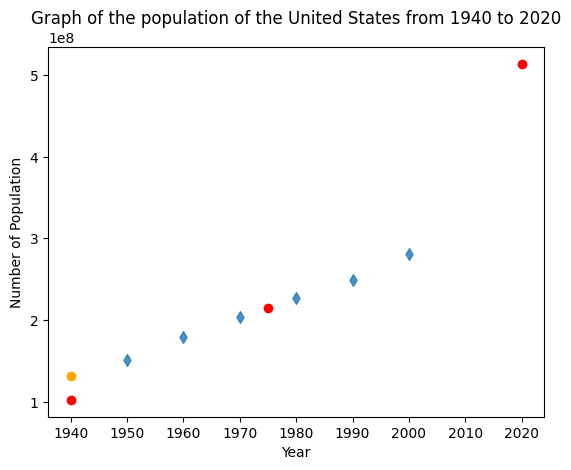

In [31]:
data_x = [1950, 1960, 1970, 1980, 1990, 2000]
data_y = [151326000, 179323000, 203302000, 226542000, 249633000, 281422000]

plt.scatter(x=data_x, y=data_y, marker="d", alpha=0.8)
plt.scatter([1940, 1975, 2020], [102397000, 215042750, 513443000], color='red')
plt.scatter(1940, 132165000, color="orange")
plt.title("Graph of the population of the United States from 1940 to 2020")
plt.xlabel("Year")
plt.ylabel("Number of Population")
plt.show()

The 1975 figure may not be very accurate, but the 2020 figure is likely to be extremely inaccurate.

## Exo18:

Determine the natural cubic spline $S$ that interpolates the data $f(0) = 0, f(1) = 1,$ and
$f(2) = 2$.

This spline consists of two cubics. The first for the interval $[0, 1]$, denoted by:
$$
S_0(x)=a_0+b_0(x-0)+c_0(x-0)^2+d_0(x-0)^3
$$
and the other for $[1,2]$, denoted by:
$$
S_1(x)=a_1+b_1(x-1)+c_1(x-1)^2+d_1(x-1)^3
$$
There are 8 constants to be determined, which requires 8 conditions. Four conditions come from the fact that the splines must agree with the data at the nodes. Hence,
$$
\begin{aligned}
& 0=f(0)=a_0, \quad 1=f(1)=a_0+b_0+c_0+d_0, \quad 1=f(1)=a_1, \quad \text { and } \\
& 2=f(2)=a_1+b_1+c_1+d_1 
\end{aligned}
$$
Two more come from the fact that $S_0^{\prime}(1)=S_1^{\prime}(1)$ and $S_0^{\prime \prime}(1)=S_1^{\prime \prime}(1)$ (continuity of a function). These are:
$$
S_0^{\prime}(1)=S_1^{\prime}(1): \quad b_0+2 c_0+3 d_0=b_1 \quad \text { and } \quad S_0^{\prime \prime}(1)=S_1^{\prime \prime}(1): \quad 2 c_0+6 d_0=2 c_1
$$
The final two come from the natural boundary conditions:
$$
S_0^{\prime \prime}(0)=0: \quad 2 c_0=0 \quad \text { and } \quad S_1^{\prime \prime}(2)=0: \quad 2 c_1+6 d_1=0 .
$$
Solving this system of equations gives the following results:
$$
\left\{\begin{array}{l}
a_1=b_1=b_0=1 \\
a_0=c_0=d_0=c_1=d_1=0
\end{array}\right.
$$
Therefore, the natural spline is:
$$
S(x)=x, \text { for } x \in[0,2]
$$

In [32]:
A = np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
              [1, 1, 1, 1, 0, 0, 0, 0], 
              [0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1, 1, 1, 1],
              [0, 1, 2, 3, 0, -1, 0, 0],
              [0, 0, 2, 6, 0, 0, -2, 0],
              [0, 0, 2, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 2, 6]])
b = np.array([0, 1, 1, 2, 0, 0, 0, 0])
x = np.linalg.solve(A, b)
x

array([ 0.,  1.,  0., -0.,  1.,  1.,  0., -0.])

## Exo19:

Determine the clamped cubic spline $s$ that interpolates the data $f(0) = 0, f(1)=1, f(2) = 2$ and satisfies $s'(0) = s''(2) = 1$.

This spline consists of two cubics. The first for the interval $[0, 1]$, denoted by:
$$
s_0(x)=a_0+b_0(x-0)+c_0(x-0)^2+d_0(x-0)^3
$$
and the other for $[1,2]$, denoted by:
$$
s_1(x)=a_1+b_1(x-1)+c_1(x-1)^2+d_1(x-1)^3
$$
There are 8 constants to be determined, which requires 8 conditions. Four conditions come from the fact that the splines must agree with the data at the nodes. Hence,
$$
\begin{aligned}
& 0=f(0)=a_0, \quad 1=f(1)=a_0+b_0+c_0+d_0, \quad 1=f(1)=a_1, \quad \text { and } \\
& 2=f(2)=a_1+b_1+c_1+d_1 
\end{aligned}
$$
Two more come from the fact that $s_0^{\prime}(1)=s_1^{\prime}(1)$ and $s_0^{\prime \prime}(1)=s_1^{\prime \prime}(1)$ (continuity of a function). These are:
$$
s_0^{\prime}(1)=s_1^{\prime}(1): \quad b_0+2 c_0+3 d_0=b_1 \quad \text { and } \quad s_0^{\prime \prime}(1)=s_1^{\prime \prime}(1): \quad 2 c_0+6 d_0=2 c_1
$$
However, the boundary conditions are now:
$$
s_0^{\prime }(0)=1: \quad b_0=1 \quad \text { and } \quad s_1^{\prime }(2)=1: \quad b_1 + 2c_1 + 3d_1 =1 .
$$
Solving this system of equations gives the following results:
$$
\left\{\begin{array}{l}
a_1=b_1=b_0=1 \\
a_0=c_0=d_0=c_1=d_1=0
\end{array}\right.
$$
Therefore, the clamped spline is:
$$
s(x)=x, \text { for } x \in[0,2]
$$

In [34]:
A_ = np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
              [1, 1, 1, 1, 0, 0, 0, 0], 
              [0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1, 1, 1, 1],
              [0, 1, 2, 3, 0, -1, 0, 0],
              [0, 0, 2, 6, 0, 0, -2, 0],
              [0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 2, 3]])
b_ = np.array([0, 1, 1, 2, 0, 0, 1, 1])
x_ = np.linalg.solve(A_, b_)
x_

array([ 0.,  1.,  0.,  0.,  1.,  1.,  0., -0.])

## Exo20:

The equation of the respective free cubic splines are:
$$
S(x) = S_i(x) = a_i + b_i(x-x_i)+c_i(x-x_i)^2 + d_i(x-x_i)^3
$$
for $x$ in $[x_i, x_{i+1}]$.

In [88]:
def reduced_row_echelon_form(matrix):
    pivot = 0 # Tracks pivot element index
    back_swap = len(matrix)-1 # To move any rows containing zeroes to the end of the matrix
    m = len(matrix) # Number of rows
    n = len(matrix[0]) # Number of columns

    for r in range(m): # Loop through each row
        scan_r = r # scan_r allows look-ahead for rows with non-zero pivot
        while matrix[scan_r][pivot] == 0: # While the current row has a zero pivot element,
            scan_r += 1 # We increment our look-ahead row counter
            if scan_r == m: # If we hit the end of the end of the matrix, then we know that all the rows contains a zero at that pivot index.
                scan_r = r # So we start from the same row, but now we look for non-zero pivot in the next column.
                pivot += 1
                if pivot == n: # If pivot == number of columns, stop. We are done. We hit the end of the matrix.
                    break
        matrix[r], matrix[scan_r] = matrix[scan_r], matrix[r] # scan_r now has the index of non-zero pivot row. Swap raw r with scan_r row.
        pivot_element = matrix[r][pivot]  # Get  the pivot element
        for i in range(n):  # We divide all the numbers in that row by the pivot element, to make our pivot element = 1	
            matrix[r][i] /= pivot_element
        for i in range(m):# Then loop through all the other rows
            if i != r: # Ensures we don't reduce the pivot row with pivot row
                factor = matrix[i][pivot] # Factor is the number by which we need to multiply our pivot row in order to reduce row i
                for j in range(n): # Subtract all the elements in row i by factor * corresponding element in our pivot row
                    matrix[i][j] -= factor*matrix[r][j]
        pivot += 1
    return matrix

In [158]:
def natural_cubic_spline(x, y):
    n = len(x)
    h = [x[i+1] - x[i] for i in range(n-1)]
    A = [0] * n # first row in A is [1, 0, 0, ...]
    A[0] = [0]*(n+1)
    A[0][0] = 1
    A[n-1] = [0] * (n+1)
    A[n-1][n-1] = 1 # Last row in A is [0, 0, 0, ......, 1]
    A[n-1][n] = 0
    idx = 0

    for i in range(1,n-1):
        a = [0] * (n+1)
        a[idx] = h[i-1]
        a[idx+1] = 2*(h[i-1] + h[i])
        a[idx+2] = h[i]
        a[n] = 3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
        idx += 1
        A[i] = a
    reduced = reduced_row_echelon_form(A) # Reduce the augmented matrix A|b to get the c in the last column

    b = [0] * (n-1)
    c = [0] * (n-1)
    d = [0] * (n-1)
    for i in range(n-1):
        c[i] = reduced[i][-1]
        c2 = reduced[i+1][-1]
        b[i] = (y[i+1]-y[i])/h[i] - h[i]*(c2 + 2*c[i])/3 # Compute b and d
        d[i] = (c2-c[i])/(3*h[i]) 

    for i in range(n-1): # Print out each equation if requested.
        factor = f"(x{')' if x[i] == 0 else f' - {x[i]:.2f})' }"
        print(f"S_{i}(x) = ", end='')
        if y[i] != 0:
            if y[i] < 0:
                print("-", end ='')
            print("%5.4f" % abs(y[i]), end = ' ')
        if b[i] != 0:
            print("-" if b[i] < 0 else "+", end =' ')
            print("%5.4f%s" % (abs(b[i]), factor), end = ' ')
        if c[i] != 0:
            print("-" if c[i] < 0 else "+", end =' ')
            print("%5.4f%s^2" % (abs(c[i]), factor), end = ' ')
        if d[i] != 0:
            print("-" if d[i] < 0 else "+", end =' ')
            print("%5.4f%s^3" % (abs(d[i]), factor))
        print("\n")
    return [y[:(n-1)], b, c, d]

In [159]:
## TEST
coeff_x = [0, 1, 2]
coeff_y = [0, 1, 2]
print(natural_cubic_spline(x=coeff_x, y=coeff_y))

S_0(x) = + 1.0000(x) 

S_1(x) = 1.0000 + 1.0000(x - 1.00) 

[[0, 1], [1.0, 1.0], [0.0, 0.0], [0.0, 0.0]]


In [259]:
## ALGORITHM IN COURSE (FOR NATURAL CUBIC SPLINE) ##
# zero vectors
def zeroV(m):
    z = [0]*m
    return(z)

#INPUT: n; x0, x1, ... ,xn; a0 = f(x0), a1 =f(x1), ... , an = f(xn).
def natural_spline(x, y):
    """This function interpolates between the knots
       specified by lists x and y. The function computes the coefficients
       and outputs the solution of possible S(x)."""          
    
    n = len(x)
    a = y
    h = zeroV(n-1)

    # alpha will be values in a system of eq's that will allow us to solve for c
    # and then from there we can find b, d through substitution.
    alpha = zeroV(n-1)

    # l, u, z are used in the method for solving the linear system
    l = zeroV(n+1)
    u = zeroV(n)
    z = zeroV(n+1)

    # b, c, d will be the coefficients along with a.
    b = zeroV(n)     
    c = zeroV(n+1)
    d = zeroV(n)    

    for i in range(n-1):
        # h[i] is used to satisfy the condition that 
        # Si+1(xi+l) = Si(xi+l) for each i = 0,..,n-1
        # i.e., the values at the knots are "doubled up"
        h[i] = x[i+1]-x[i]  

    for i in range(1, n-1):
        # Sets up the linear system and allows us to find c.  Once we have 
        # c then b and d follow in terms of it.
        alpha[i] = (3./h[i])*(a[i+1]-a[i])-(3./h[i-1])*(a[i] - a[i-1])

    # I, II, (part of) III Sets up and solves tridiagonal linear system...
    # I   
    l[0] = 1      
    u[0] = 0      
    z[0] = 0

    # II
    for i in range(1, n-1):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    l[n] = 1
    z[n] = 0
    c[n] = 0

    # III... also find b, d in terms of c.
    for j in range(n-2, -1, -1):      
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3.
        d[j] = (c[j+1] - c[j])/(3*h[j]) 
        
    for i in range(n-1): # Print out each equation if requested.
        factor = f"(x{')' if x[i] == 0 else f' - {x[i]:.2f})' }"
        print(f"S_{i}(x) = ", end='')
        if y[i] != 0:
            if y[i] < 0:
                print("-", end ='')
            print("%5.4f" % abs(y[i]), end = ' ')
        if b[i] != 0:
            print("-" if b[i] < 0 else "+", end =' ')
            print("%5.4f%s" % (abs(b[i]), factor), end = ' ')
        if c[i] != 0:
            print("-" if c[i] < 0 else "+", end =' ')
            print("%5.4f%s^2" % (abs(c[i]), factor), end = ' ')
        if d[i] != 0:
            print("-" if d[i] < 0 else "+", end =' ')
            print("%5.4f%s^3" % (abs(d[i]), factor))
        print("\n")
        
    return [y[:(n-1)], b[:(n-1)], c[:(n-1)], d[:(n-1)]]

In [262]:
## TEST
coeff_x = [0, 1, 2]
coeff_y = [0, 1, 2]
print(natural_spline(x=coeff_x, y=coeff_y))

S_0(x) = + 1.0000(x) 

S_1(x) = 1.0000 + 1.0000(x - 1.00) 

[[0, 1], [1.0, 1.0], [0.0, 0.0], [0.0, 0.0]]


## (a).

In [263]:
coeff_x = [0.8, 1.0]
coeff_y = [0.22363362, 0.65809197]
print(natural_cubic_spline(x=coeff_x, y=coeff_y))

S_0(x) = 0.2236 + 2.1723(x - 0.80) 

[[0.22363362], [2.1722917500000003], [0.0], [0.0]]


## (b).

In [121]:
coeff_x = [0.1, 0.2, 0.3, 0.4]
coeff_y = [-0.62049958, -0.28398668, 0.00660095, 0.24842440]
print(natural_cubic_spline(x=coeff_x, y=coeff_y))

S_0(x) = -0.6205 + 3.4551(x - 0.10) - 8.9958(x - 0.10)^3


S_1(x) = -0.2840 + 3.1852(x - 0.20) - 2.6987(x - 0.20)^2 - 0.9463(x - 0.20)^3


S_2(x) = 0.0066 + 2.6171(x - 0.30) - 2.9826(x - 0.30)^2 + 9.9421(x - 0.30)^3


[[-0.62049958, -0.28398668, 0.00660095], [3.455086933333334, 3.185213133333334, 2.617076433333333], [0.0, -2.6987379999999974, -2.982629000000011], [-8.995793333333323, -0.9463033333333783, 9.9420966666667]]


## Exo21:

We denote the function in $[0,1]$ by $f_1(x)$ and the function in $[1,2]$ by $f_2(x)$. We then have
$$
\begin{aligned}
f_1(x) & = S_0(x)=1 + 2x - x^3, \\
f_1^{\prime}(x) & =2 - 3x^2, \\
f_1^{\prime \prime}(x) & = -6 x, \\
f_2(x) & = S_1(x) = 2 + b(x-1)+c(x-1)^2+d(x-1)^3, \\
f_2^{\prime}(x) & =b + 2c(x-1)+3d(x-1)^2, \\
f_2^{\prime \prime}(x) & =2 c+6d(x-1) 
\end{aligned}
$$
For $S(x)$ to be a natural spline, the second derivative at the first node $(x=0)$ and at the last node $(x=2)$
should be 0. That is $f_1^{\prime \prime}(0)=0$ and $f_2^{\prime \prime}(2)=0$, which implies that $2c + 6d=0$.

The continuity of $S(x)$ at $x=1$ implies that:
$$
f_1(1)=f_2(1) \Longleftrightarrow 2=2 \quad \text{(True)}
$$
The continuity of $S^{\prime}(x)$ at $x=1$ implies that:
$$
f_1^{\prime}(1)=f_2^{\prime}(1) \Longleftrightarrow b=-1
$$
Finally, the continuity of $S^{\prime \prime}(x)$ at $x=1$ implies that
$$
f_1^{\prime \prime}(1) = f_2^{\prime \prime}(1) \Longleftrightarrow c=-3
$$
Thus, these equations are satisfies when $b=-1, c=-3$, and $d=1$.

## Exo22:

We denote the function in $[1,2]$ by $f_1(x)$ and the function in $[2,3]$ by $f_2(x)$. We then have
$$
\begin{aligned}
f_1(x) & = S_0(x) = 3(x-1) + 2(x-1)^2 - (x-1)^3, \\
f_1^{\prime}(x) & =3 + 4(x-1) - 3(x-1)^2, \\
f_1^{\prime \prime}(x) & = 4 - 6(x-1), \\
f_2(x) & = S_1(x) = a + b(x-2) + c(x-2)^2 + d(x-2)^3, \\
f_2^{\prime}(x) & = b + 2c(x-2)+3d(x-2)^2, \\
f_2^{\prime \prime}(x) & = 2 c + 6d(x-2) 
\end{aligned}
$$
For $S(x)$ to be a clamped spline, we have $f_1^{\prime }(1)=f_2^{\prime }(3)$ , which implies that $b+2c + 3d=3$.

The continuity of $S(x)$ at $x=2$ implies that:
$$
f_1(2)=f_2(2) \Longleftrightarrow a = 4 
$$
The continuity of $S^{\prime}(x)$ at $x=2$ implies that:
$$
f_1^{\prime}(2)=f_2^{\prime}(2) \Longleftrightarrow b=4
$$
Finally, the continuity of $S^{\prime \prime}(x)$ at $x=2$ implies that:
$$
f_1^{\prime \prime}(2) = f_2^{\prime \prime}(2) \Longleftrightarrow c=-1
$$
Thus, these equations are satisfies when $a=4, b=4, c=-1$, and $d=\frac{1}{3}$.

## Exo23:

In [254]:
## ALGORITHM IN COURSE (FOR CLAMPED CUBIC SPLINE) ##

#INPUT: n; x0, x1, ... ,xn; a0 = f(x0), a1 =f(x1), ... , an = f(xn), FPO=f'(x0), FPN=f'(xn).
def clamped_cubic_spline(x, y, FPO, FPN):
    """This function interpolates between the knots
       specified by lists x and y. The function computes the coefficients
       and outputs the solution of possible S(x)."""        
    
    n = len(x)
    a = y
    h = zeroV(n-1)

    # alpha will be values in a system of eq's that will allow us to solve for c
    # and then from there we can find b, d through substitution.
    alpha = zeroV(n)

    # l, u, z are used in the method for solving the linear system
    l = zeroV(n+1)
    u = zeroV(n)
    z = zeroV(n+1)

    # b, c, d will be the coefficients along with a.
    b = zeroV(n)     
    c = zeroV(n+1)
    d = zeroV(n)    

    for i in range(n-1):
        # h[i] is used to satisfy the condition that 
        # Si+1(xi+l) = Si(xi+l) for each i = 0,..,n-1
        # i.e., the values at the knots are "doubled up"
        h[i] = x[i+1]-x[i]  
        
    alpha[0] = 3*(a[1] - a[0])/h[0] - 3*FPO
    alpha[n-1] = 3*FPN - 3*(a[n-1] - a[n-2])/h[n-2]

    for i in range(1, n-1):
        # Sets up the linear system and allows us to find c.  Once we have 
        # c then b and d follow in terms of it.
        alpha[i] = (3./h[i])*(a[i+1]-a[i])-(3./h[i-1])*(a[i] - a[i-1])

    # I, II, (part of) III Sets up and solves tridiagonal linear system...
    # I   
    l[0] = 2*h[0]     
    u[0] = 0.5      
    z[0] = alpha[0]/l[0]

    # II
    for i in range(1, n-1):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    l[n] = h[n-2]*(2-u[n-2])
    z[n] = (alpha[n-1] - h[n-2]*z[n-2])/l[n]
    c[n] = z[n]

    # III... also find b, d in terms of c.
    for j in range(n-2, -1, -1):      
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3.
        d[j] = (c[j+1] - c[j])/(3*h[j]) 
        
    for i in range(n-1): # Print out each equation if requested.
        factor = f"(x{')' if x[i] == 0 else f' - {x[i]:.2f})' }"
        print(f"s_{i}(x) = ", end='')
        if y[i] != 0:
            if y[i] < 0:
                print("-", end ='')
            print("%5.4f" % abs(y[i]), end = ' ')
        if b[i] != 0:
            print("-" if b[i] < 0 else "+", end =' ')
            print("%5.4f%s" % (abs(b[i]), factor), end = ' ')
        if c[i] != 0:
            print("-" if c[i] < 0 else "+", end =' ')
            print("%5.4f%s^2" % (abs(c[i]), factor), end = ' ')
        if d[i] != 0:
            print("-" if d[i] < 0 else "+", end =' ')
            print("%5.4f%s^3" % (abs(d[i]), factor))
        print("\n")
        
    return [y[:(n-1)], b[:(n-1)], c[:(n-1)], d[:(n-1)]]

In [255]:
## TEST
coeff_x = [0, 1, 2]
coeff_y = [0, 1, 2]
print(clamped_cubic_spline(x=coeff_x, y=coeff_y, FPO=1, FPN=1))

s_0(x) = + 1.0000(x) 

s_1(x) = 1.0000 + 1.0000(x - 1.00) 

[[0, 1], [1.0, 1.0], [0.0, 0.0], [0.0, 0.0]]


## (a).

Use a clamped cubic spline to predict the position of the car and its speed when $t = 10s$.

The equation of the clamped cubic splines are given by:
$$
s(x) = s_i(x) = a_i + b_i(x-x_i)+c_i(x-x_i)^2 + d_i(x-x_i)^3
$$
for $x$ in $[x_i, x_{i+1}]$.

In [241]:
coeff_x = [0, 3, 5, 8, 13]
coeff_y = [0, 225, 383, 623, 993]
print(clamped_cubic_spline(x=coeff_x, y=coeff_y, FPO=75, FPN=72))

s_0(x) = + 75.0000(x) - 0.6593(x)^2 + 0.2198(x)^3


s_1(x) = 225.0000 + 76.9779(x - 3.00) + 1.3186(x - 3.00)^2 - 0.1538(x - 3.00)^3


s_2(x) = 383.0000 + 80.4071(x - 5.00) + 0.3961(x - 5.00)^2 - 0.1773(x - 5.00)^3


s_3(x) = 623.0000 + 77.9975(x - 8.00) - 1.1993(x - 8.00)^2 + 0.0800(x - 8.00)^3


[[0, 225, 383, 623], [75.0, 76.97785977859779, 80.4071340713407, 77.99753997539976], [-0.6592865928659287, 1.3185731857318574, 0.3960639606396064, -1.1992619926199264], [0.21976219762197624, -0.15375153751537518, -0.1772584392510592, 0.0799507995079951]]


We obatain then:
$$
s_3(x) = 623.0000 + 77.9975(x - 8.00) - 1.1993(x - 8.00)^2 + 0.0800(x - 8.00)^3 \quad \text{for} \quad x \in [8,13]
$$
And 
$$
s^{\prime}_3(x) = 77.9975 - 2.3986(x - 8.00) + 0.24(x - 8.00)^2 \quad \text{for} \quad x \in [8,13]
$$
So that: $s_3(10)=774.8378$ and $s^{\prime}_3(10) = 74.16029999999999$.

Therefore, the clamped cubic spline predicts the position of the car and its speed when $t = 10s$ with $s_3(10)=774.84$ ft and the speed of $s^{\prime}_3(x) = 74.16$ ft/s.

In [242]:
S_3 = lambda x: 623.0000 + 77.9975*(x - 8.00) - 1.1993*(x - 8.00)**2 + 0.0800*(x - 8.00)**3
S_prime_3 = lambda x: 77.9975 - 2.3986*(x - 8.00) + 0.24*(x - 8.00)**2
print(S_3(10))
print(S_prime_3(10))

774.8378
74.16029999999999


## (b).

Use the derivative of the spline to determine whether the car ever exceeds a 55mi/h speed limit on the road; if so, what is the first time the car exceeds this speed?

First, let's take a look at the speed in mi/h. Note that the formula to convert from ft/s to mi/h is given by:

mi/h = ft/s $\times 0.681818$

\begin{array}{|c|c|c|c|c|c|}
\hline \text{Time} & 0 & 3  & 5 & 8 & 13 \\
\hline \text{Distance} & 0 & 225 & 383 & 623 & 993 \\
\hline \text{Speed (mi/h)}  & 51.13635 & 52.499986 & 54.54544 & 50.454532 & 49.090896 \\
\hline
\end{array}

In [264]:
def ft_s_TO_mi_h(x):
    return x*0.681818
list_speed_ft_s = [75, 77, 80, 74, 72]
list_speed_mi_h = [ft_s_TO_mi_h(s) for s in list_speed_ft_s]
print(list_speed_mi_h)

[51.13635, 52.499986, 54.54544, 50.454532, 49.090896]


To maximize the speed, we find the single critical point of $s^{\prime}(x)$, and compare the values of $s(x)$ at this point and the endpoint.

By using the table above, we will use the function $s_2(x)$ and we will find the critical point of the speed $s'_2(x)$ using the classical method, $s''_{2}(x)=0$. We have:
$$
s_2(x) = 383.0000 + 80.4071(x - 5.00) + 0.3961(x - 5.00)^2 - 0.1773(x - 5.00)^3
$$
So that:
$$
s'_2(x) = 80.4071+ 0.7922(x - 5.00) - 0.5319(x - 5.00)^2
$$
And
$$
s''_2(x) =0.7922 - 1.0638(x - 5.00)
$$
Since $s''_{2}(x)=0$, it implies that $x=5.745$.

We obtain then: $s'_2(5.745)=80.7$ ft/s $=55.024$ mi/h.

Therefore, we conclude that the speed $55$ mi/h was first exceeded at approximately $5.5 s$.

In [244]:
s_2 = lambda x: 383.0000 + 80.4071*(x - 5.00) + 0.3961*(x - 5.00)**2 - 0.1773*(x - 5.00)**3
s_prime_2 = lambda x: 80.4071+ 0.7922*(x - 5.00) - 0.5319*(x - 5.00)**2
print(s_2(5.745))
print(s_prime_2(5.745))
print(ft_s_TO_mi_h(s_prime_2(5.745)))

443.04982248278753
80.7020712025
55.02412478314614


## (c).

The predicted maximum speed for the car is:  $s'_2(5.745)=80.7$ ft/s $=55.024$ mi/h.

## Exo24:

In [245]:
print("For Curve 1 (Clamped Cubic Spline 1):")
coeff_x = [1, 2, 5, 6, 7, 8, 10, 13, 17]
coeff_y = [3, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]
print(clamped_cubic_spline(x=coeff_x, y=coeff_y, FPO=1, FPN=-0.67))

For Curve 1 (Clamped Cubic Spline 1):
s_0(x) = 3.0000 + 1.0000(x - 1.00) - 0.3468(x - 1.00)^2 + 0.0468(x - 1.00)^3


s_1(x) = 3.7000 + 0.4468(x - 2.00) - 0.2064(x - 2.00)^2 + 0.0266(x - 2.00)^3


s_2(x) = 3.9000 - 0.0745(x - 5.00) + 0.0326(x - 5.00)^2 + 0.3419(x - 5.00)^3


s_3(x) = 4.2000 + 1.0163(x - 6.00) + 1.0582(x - 6.00)^2 - 0.5745(x - 6.00)^3


s_4(x) = 5.7000 + 1.4091(x - 7.00) - 0.6654(x - 7.00)^2 + 0.1562(x - 7.00)^3


s_5(x) = 6.6000 + 0.5471(x - 8.00) - 0.1967(x - 8.00)^2 + 0.0241(x - 8.00)^3


s_6(x) = 7.1000 + 0.0492(x - 10.00) - 0.0522(x - 10.00)^2 - 0.0029(x - 10.00)^3


s_7(x) = 6.7000 - 0.3418(x - 13.00) - 0.0781(x - 13.00)^2 + 0.0065(x - 13.00)^3


[[3, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7], [1.0, 0.44680946969363283, -0.07447575754906177, 1.0163321968996213, 1.4091469699505779, 0.5470799232980652, 0.04922652031044922, -0.34175248649934364], [-0.34680946969363236, -0.20638106061273476, 0.03261931819850325, 1.0581886362501796, -0.6653738631992229, -0.1966931834532899, -0

In [246]:
print("For Curve 2 (Clamped Cubic Spline 2):")
coeff_x = [17, 20, 23, 24, 25, 27, 27.7]
coeff_y = [4.5, 7, 6.1, 5.6, 5.8, 5.2, 4.1]
print(clamped_cubic_spline(x=coeff_x, y=coeff_y, FPO=3, FPN=-4))

For Curve 2 (Clamped Cubic Spline 2):
s_0(x) = 4.5000 + 3.0000(x - 17.00) - 1.0993(x - 17.00)^2 + 0.1257(x - 17.00)^3


s_1(x) = 7.0000 - 0.2021(x - 20.00) + 0.0319(x - 20.00)^2 - 0.0215(x - 20.00)^3


s_2(x) = 6.1000 - 0.5915(x - 23.00) - 0.1617(x - 23.00)^2 + 0.2532(x - 23.00)^3


s_3(x) = 5.6000 - 0.1552(x - 24.00) + 0.5980(x - 24.00)^2 - 0.2428(x - 24.00)^3


s_4(x) = 5.8000 + 0.3125(x - 25.00) - 0.1303(x - 25.00)^2 - 0.0880(x - 25.00)^3


s_5(x) = 5.2000 - 1.2643(x - 27.00) - 0.6581(x - 27.00)^2 + 0.3134(x - 27.00)^3


[[4.5, 7, 6.1, 5.6, 5.8, 5.2], [3.0, -0.20211961050923294, -0.5915215579630686, -0.15523597526207294, 0.3124654590113607, -1.264320803544017], [-1.099293463163589, 0.03192025966051137, -0.1617209088117899, 0.5980064915127856, -0.13030505723935193, -0.6580880740383369], [0.12569041364712225, -0.021515685385811254, 0.2532424667748585, -0.24277051625071253, -0.08796383613316416, 0.3133752733515893]]


In [247]:
print("For Curve 3 (Clamped Cubic Spline 3):")
coeff_x = [27.7, 28, 29, 30]
coeff_y = [4.1, 4.3, 4.1, 3]
print(clamped_cubic_spline(x=coeff_x, y=coeff_y, FPO=0.33, FPN=-1.5))

For Curve 3 (Clamped Cubic Spline 3):
s_0(x) = 4.1000 + 0.3300(x - 27.70) + 2.2356(x - 27.70)^2 - 3.7113(x - 27.70)^3


s_1(x) = 4.3000 + 0.6693(x - 28.00) - 1.1045(x - 28.00)^2 + 0.2352(x - 28.00)^3


s_2(x) = 4.1000 - 0.8341(x - 29.00) - 0.3989(x - 29.00)^2 + 0.1330(x - 29.00)^3


[[4.1, 4.3, 4.1], [0.33, 0.6693181818181805, -0.8340909090909087], [2.2356060606060506, -1.1045454545454527, -0.3988636363636365], [-3.7112794612794393, 0.2352272727272721, 0.1329545454545455]]


## Exo25:

In [248]:
print("For Curve 1 (Natural Cubic Spline 1):")
coeff_x = [1, 2, 5, 6, 7, 8, 10, 13, 17]
coeff_y = [3, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]
print(natural_cubic_spline(x=coeff_x, y=coeff_y))

For Curve 1 (Natural Cubic Spline 1):
S_0(x) = 3.0000 + 0.7857(x - 1.00) - 0.0857(x - 1.00)^3


S_1(x) = 3.7000 + 0.5286(x - 2.00) - 0.2571(x - 2.00)^2 + 0.0344(x - 2.00)^3


S_2(x) = 3.9000 - 0.0858(x - 5.00) + 0.0523(x - 5.00)^2 + 0.3335(x - 5.00)^3


S_3(x) = 4.2000 + 1.0194(x - 6.00) + 1.0529(x - 6.00)^2 - 0.5723(x - 6.00)^3


S_4(x) = 5.7000 + 1.4083(x - 7.00) - 0.6640(x - 7.00)^2 + 0.1557(x - 7.00)^3


S_5(x) = 6.6000 + 0.5474(x - 8.00) - 0.1969(x - 8.00)^2 + 0.0241(x - 8.00)^3


S_6(x) = 7.1000 + 0.0491(x - 10.00) - 0.0522(x - 10.00)^2 - 0.0029(x - 10.00)^3


S_7(x) = 6.7000 - 0.3417(x - 13.00) - 0.0781(x - 13.00)^2 + 0.0065(x - 13.00)^3


[[3, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7], [0.78570442264633, 0.5285911547073402, -0.08584250559771212, 1.0193829633581195, 1.4083106521652347, 0.54737442798094, 0.049132127783886814, -0.34172228089084367], [0.0, -0.2571132679389896, 0.05230204783730551, 1.052923421118526, -0.6639957323114111, -0.19694049187288346, -0.052180658225643176, -0.0781

In [249]:
print("For Curve 2 (Natural Cubic Spline 2):")
coeff_x = [17, 20, 23, 24, 25, 27, 27.7]
coeff_y = [4.5, 7, 6.1, 5.6, 5.8, 5.2, 4.1]
print(natural_cubic_spline(x=coeff_x, y=coeff_y))

For Curve 2 (Natural Cubic Spline 2):
S_0(x) = 4.5000 + 1.1057(x - 17.00) - 0.0303(x - 17.00)^3


S_1(x) = 7.0000 + 0.2885(x - 20.00) - 0.2724(x - 20.00)^2 + 0.0254(x - 20.00)^3


S_2(x) = 6.1000 - 0.6599(x - 23.00) - 0.0437(x - 23.00)^2 + 0.2036(x - 23.00)^3


S_3(x) = 5.6000 - 0.1366(x - 24.00) + 0.5670(x - 24.00)^2 - 0.2305(x - 24.00)^3


S_4(x) = 5.8000 + 0.3061(x - 25.00) - 0.1244(x - 25.00)^2 - 0.0893(x - 25.00)^3


S_5(x) = 5.2000 - 1.2633(x - 27.00) - 0.6603(x - 27.00)^2 + 0.3144(x - 27.00)^3


[[4.5, 7, 6.1, 5.6, 5.8, 5.2], [1.1057343776079311, 0.2885312447841381, -0.6598593567444835, -0.13655213027609037, 0.30606787784884537, -1.2633030065408895], [0.0, -0.2724010442745977, -0.043729156234942834, 0.567036382703336, -0.12441637457840032, -0.6602690676164671], [-0.030266782697177523, 0.025407987559961653, 0.2035885129794263, -0.23048425242724546, -0.08930878217301112, 0.3144138417221275]]


In [250]:
print("For Curve 3 (Natural Cubic Spline 3):")
coeff_x = [27.7, 28, 29, 30]
coeff_y = [4.1, 4.3, 4.1, 3]
print(natural_cubic_spline(x=coeff_x, y=coeff_y))

For Curve 3 (Natural Cubic Spline 3):
S_0(x) = 4.1000 + 0.7486(x - 27.70) - 0.9102(x - 27.70)^3


S_1(x) = 4.3000 + 0.5028(x - 28.00) - 0.8191(x - 28.00)^2 + 0.1163(x - 28.00)^3


S_2(x) = 4.1000 - 0.7865(x - 29.00) - 0.4702(x - 29.00)^2 + 0.1567(x - 29.00)^3


[[4.1, 4.3, 4.1], [0.7485815602836869, 0.502836879432623, -0.7865248226950352], [0.0, -0.8191489361702113, -0.47021276595744677], [-0.910165484633566, 0.1163120567375882, 0.15673758865248225]]
